In [11]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-dev20190130


In [12]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

32768/29515=================================] - 0s 2us/step
26427392/26421880==============================] - 6s 0us/step
8192/5148===============================================] - 0s 0s/step
4423680/4422102==============================] - 1s 0us/step


In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
test_images.shape

(10000, 28, 28)

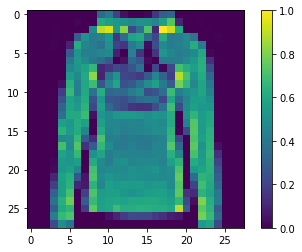

In [43]:
plt.figure()
plt.imshow(train_images[16650])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

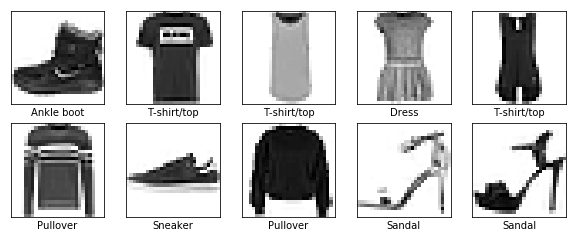

In [54]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0206 15:24:04.289164 11152 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1253: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0206 15:26:38.063219 11152 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_utils.py:123: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000==============================] - 3s 54us/sample - loss: 0.5009 - acc: 0.8253
Epoch 2/5
60000/60000==============================] - 2s 41us/sample - loss: 0.3780 - acc: 0.8636
Epoch 3/5
60000/60000==============================] - 2s 38us/sample - loss: 0.3380 - acc: 0.8766
Epoch 4/5
60000/60000==============================] - 2s 41us/sample - loss: 0.3127 - acc: 0.8852
Epoch 5/5
60000/60000==============================] - 2s 37us/sample - loss: 0.2968 - acc: 0.8898


In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000==============================] - 0s 23us/sample - loss: 0.3522 - acc: 0.8760
Test accuracy: 0.876


In [24]:
predictions = model.predict(test_images)

In [25]:
predictions[0]

array([3.2472090e-05, 6.8282446e-07, 8.3013907e-07, 6.4652248e-08,
       1.2689685e-07, 5.5069602e-03, 9.7201666e-07, 8.0802672e-02,
       2.8982233e-05, 9.1362619e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

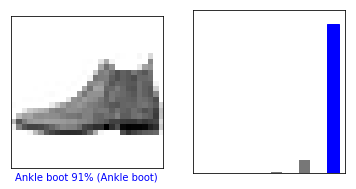

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

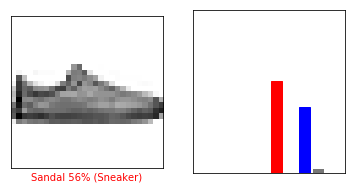

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

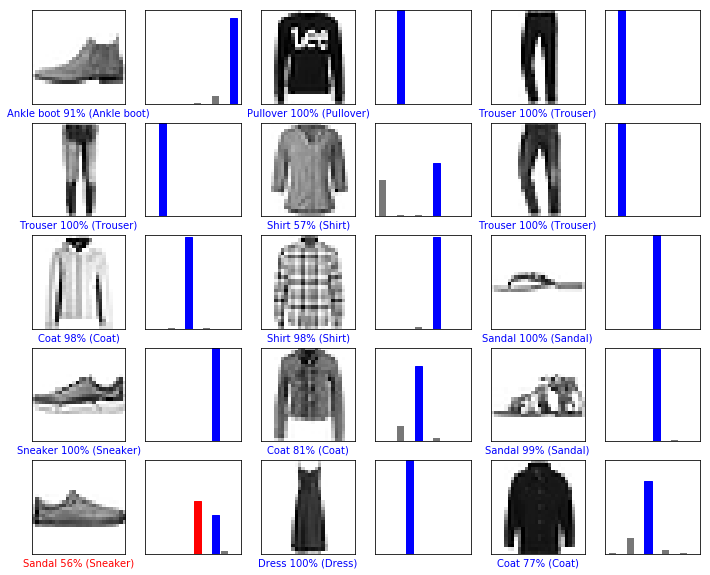

In [31]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [32]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [33]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.2472060e-05 6.8282509e-07 8.3013828e-07 6.4652248e-08 1.2689674e-07
  5.5069579e-03 9.7201485e-07 8.0802672e-02 2.8982233e-05 9.1362619e-01]]


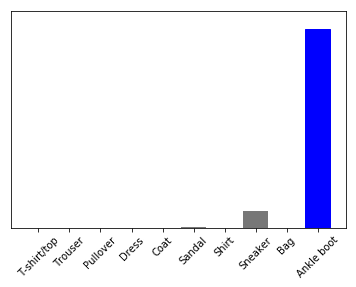

In [35]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
np.argmax(predictions_single[0])

9